In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from utils import *
import matplotlib.pyplot as plt
from collections import Counter

2023-06-08 22:03:50.177031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 22:03:51.144756: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x = []
y = []

f = open("05_06_2023_15:50:36.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(0)

f.close()

f = open("05_06_2023_15:51:16.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(1)

f.close()

f = open("05_06_2023_15:52:01.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(2)

f.close()

# f = open("05_06_2023_15:52:33.csv", "r")

# for line in f.readlines():
#     ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
#     x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
#     y.append(3)

# f.close()

f = open("05_06_2023_16:05:36.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(0)

f.close()

f = open("05_06_2023_16:06:09.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(1)

f.close()

f = open("05_06_2023_16:06:31.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(2)

f.close()

# f = open("05_06_2023_16:06:47.csv", "r")

# for line in f.readlines():
#     ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
#     x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
#     y.append(3)

# f.close()

f = open("05_06_2023_16:11:03.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(0)

f.close()

f = open("05_06_2023_16:13:07.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(1)

f.close()

f = open("05_06_2023_16:13:27.csv", "r")

for line in f.readlines():
    ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
    x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
    y.append(2)

f.close()

# f = open("05_06_2023_16:15:59.csv", "r")

# for line in f.readlines():
#     ps = [[aux for aux in p[1:-2].split(" ") if len(aux)>0] for p in line.split(",")]
#     x.append([[float(p[0]), float(p[1]), float(p[2])] for p in ps])
#     y.append(3)

# f.close()


x = np.array(x)
y = np.array(y)

In [3]:
x

array([[[0.12621748, 0.03053671, 0.4210961 ],
        [0.43127408, 0.        , 0.5036203 ],
        [0.60221953, 0.1238711 , 0.5273527 ],
        ...,
        [0.33698609, 0.756369  , 0.476573  ],
        [0.32703095, 0.6619892 , 0.5352321 ],
        [0.28780927, 0.57463723, 0.5612021 ]],

       [[0.13892601, 0.00417175, 0.4071297 ],
        [0.43169547, 0.        , 0.4759909 ],
        [0.59288919, 0.11772515, 0.5035948 ],
        ...,
        [0.3431268 , 0.71582862, 0.4916106 ],
        [0.33419176, 0.63855766, 0.5417468 ],
        [0.31396499, 0.54878924, 0.56647131]],

       [[0.29421171, 0.0262582 , 0.4576625 ],
        [0.51923538, 0.        , 0.4966571 ],
        [0.65865086, 0.13972314, 0.518631  ],
        ...,
        [0.29152438, 0.67826342, 0.481945  ],
        [0.29712554, 0.61036892, 0.514838  ],
        [0.28176584, 0.53342361, 0.53366815]],

       ...,

       [[0.03133164, 0.0738621 , 0.5827395 ],
        [0.27801966, 0.        , 0.6085422 ],
        [0.50485904, 0

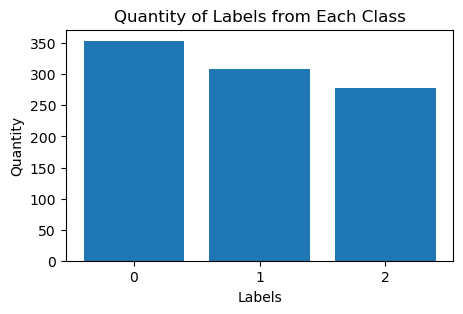

In [4]:
def draw_bar_chart(labels):
    fig, ax = plt.subplots(figsize=(5, 3))
    # Count the frequency of each label
    label_counts = Counter(labels)

    # Get the labels and their respective counts
    labels = list(label_counts.keys())
    counts = list(label_counts.values())

    # Set up the bar chart
    plt.bar(labels, counts)
    ax.set_xticks(labels)
    plt.xlabel('Labels')
    plt.ylabel('Quantity')
    plt.title('Quantity of Labels from Each Class')

    # Display the chart
    plt.show()

draw_bar_chart(y)

[0 1 2]
3


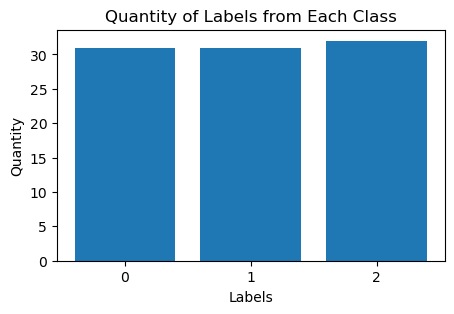

In [5]:
num = len(y)

idx = np.random.permutation(num)

x = x[idx]
y = y[idx]

n_classes = len(np.unique(y))

print(np.unique(y))

print(n_classes)

x_train, y_train, x_val, y_val, x_test, y_test = split_and_shuffle2(x, y)

x_train = x_train.reshape(-1, x.shape[1], x.shape[2], 1)
x_val = x_val.reshape(-1, x.shape[1], x.shape[2], 1)
x_test = x_test.reshape(-1, x.shape[1], x.shape[2], 1)

draw_bar_chart(y_val)

In [6]:
def fc_model():
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   #model.add(tf.keras.Input(shape=(21,3)))
   model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(21,3,1)))
   model.add(tf.keras.layers.MaxPooling2D(2, 2))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dense(128))
   model.add(tf.keras.layers.Dense(64, activation='relu'))
   model.add(tf.keras.layers.Dense(3, activation="softmax"))
   return model

In [7]:
input_shape = x.shape[1:]

model = fc_model()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"]
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    #validation_split=0.2,
    epochs=1000,
    batch_size=16,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

2023-06-08 22:03:53.856207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 22:03:53.896709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 22:03:53.896964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 3, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 1, 64)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 128)               82048     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

2023-06-08 22:03:56.487753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-06-08 22:03:57.209913: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f5c4c381180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-08 22:03:57.209940: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-06-08 22:03:57.215181: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-08 22:03:57.381018: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


47/47 [==============================] - 4s 10ms/step - loss: 1.0977 - sparse_categorical_accuracy: 0.3604 - val_loss: 1.1036 - val_sparse_categorical_accuracy: 0.3298
Epoch 2/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0906 - sparse_categorical_accuracy: 0.3870 - val_loss: 1.1054 - val_sparse_categorical_accuracy: 0.3298
Epoch 3/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0889 - sparse_categorical_accuracy: 0.3870 - val_loss: 1.1053 - val_sparse_categorical_accuracy: 0.3298
Epoch 4/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0874 - sparse_categorical_accuracy: 0.3870 - val_loss: 1.1035 - val_sparse_categorical_accuracy: 0.3298
Epoch 5/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0841 - sparse_categorical_accuracy: 0.3870 - val_loss: 1.1014 - val_sparse_categorical_accuracy: 0.3298
Epoch 6/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0817 - sparse_categorical_accuracy: 

[0.9767663478851318, 0.6315789222717285]

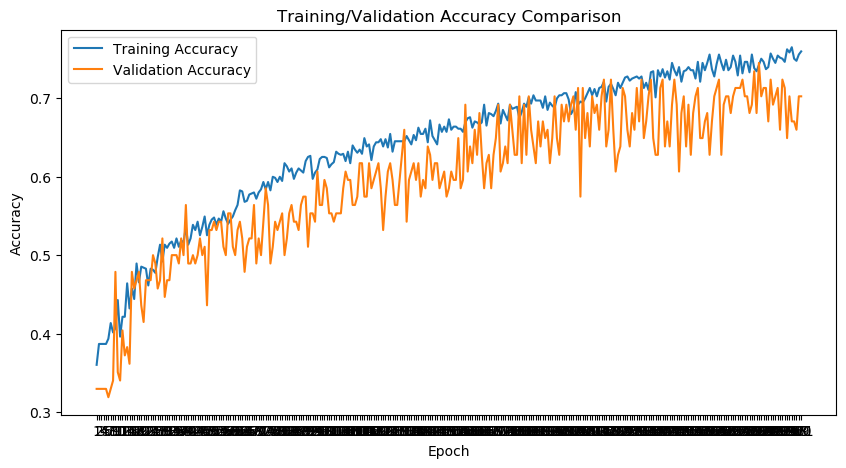

In [14]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

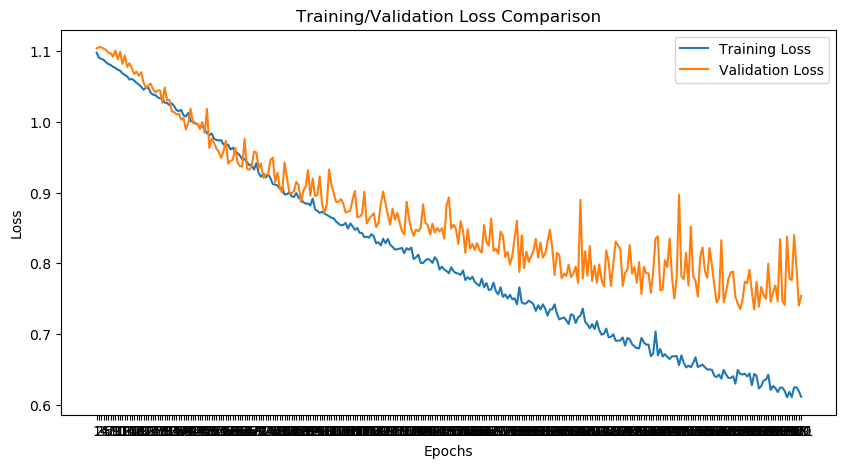

In [15]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

3/3 [==============================] - 0s 2ms/step


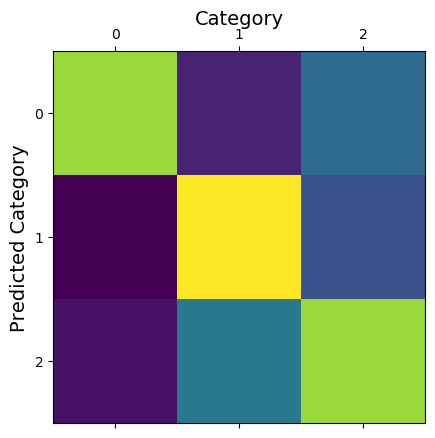

In [16]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
plot_confusion_matrix(y_test, y_pred)

In [11]:
# #a = np.array([0,1,0,0,1,0,0,1,0,0])
# #a = np.array([1,1,0,1,1,0,1,1,0,1])
# #a = np.array([2,2,0,2,2,1,2,2,3,2])
# a = np.array([7,7,0,7,7,3,7,7,6,7])

# a = a.reshape((1, a.shape[0],1))

# print(a.shape)

# model.predict(a)

In [12]:
# model.save('../models/transformer_numbers')

In [13]:
#model = tf.keras.models.load_model('../models/transformer_numbers')